In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import _tree
import graphviz

In [2]:
iris = load_iris() 
X = iris.data 
y = iris.target

model= RandomForestClassifier(random_state=0)
model.fit(X, y)

RandomForestClassifier(random_state=0)

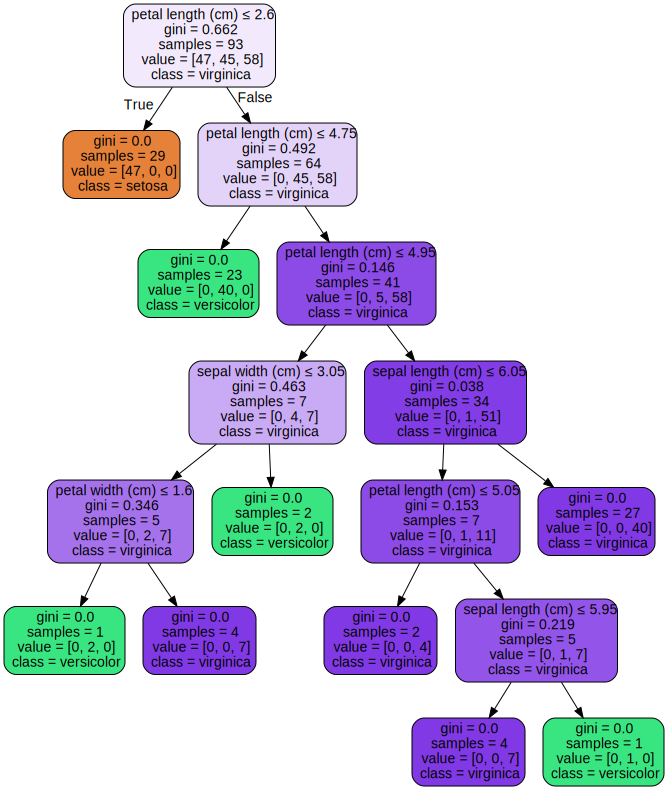

In [3]:
tree_idx = 11 # total 100 trees
dot_data = tree.export_graphviz(model.estimators_[tree_idx], out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

In [4]:
def fill_mx(matrix, feature_list, test_list):
    l = len(test_list)
    for i in range(l-1):
        for j in range(i+1,l):
            x = feature_list.index(test_list[i])
            y = feature_list.index(test_list[j])
            if (x==y): continue
            matrix[min(x,y)][max(x,y)] += 1

In [5]:
def recurse(node, list):
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        list.append(feature_name[node])
        recurse(tree_.children_left[node], list)
        recurse(tree_.children_right[node], list)
        del list[-1]
    else:
        fill_mx(matrix, feature_names, list)
                
feature_names = ['SL', 'SW', 'PL', 'PW']
feature_list = []
matrix = np.array(np.zeros((len(feature_names),len(feature_names))))

#start recurse
for tree in model.estimators_:
    tree_ = tree.tree_
    feature_name = [
            feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature
        ]
    recurse(0, feature_list)

print(matrix)
matrix = matrix/(np.max(matrix))
print('\nnormalized:\n',matrix)


[[   0.  245.  921.  842.]
 [   0.    0.  459.  462.]
 [   0.    0.    0. 1584.]
 [   0.    0.    0.    0.]]

normalized:
 [[0.         0.15467172 0.58143939 0.53156566]
 [0.         0.         0.28977273 0.29166667]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]


In [6]:
from pyvis.network import Network
import networkx as nx 

g = Network(height='750px', width='100%', bgcolor='#222222', font_color='white', notebook=True)

g.barnes_hut()
# add nodes
g.add_nodes(feature_names)

# edges from matrix
for i in range(len(feature_names)-1):
    for j in range(i+1,len(feature_names)):
        g.add_edge(feature_names[i], feature_names[j], value=matrix[i][j])
            
g.show("iris_network.html")